In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TIME SERIES ANALYSIS/sales_train.csv")

In [ ]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
print(df_train.shape)
df_train.dtypes

(2935849, 6)


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [ ]:
df_train=df_train[(df_train.item_cnt_day>0) & (df_train.item_cnt_day<600)]

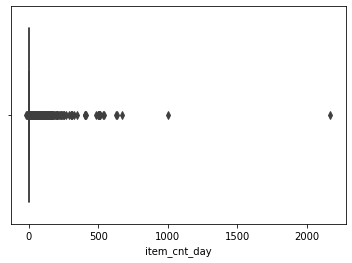

In [ ]:
import seaborn as sns
sns.boxplot(x=df_train.item_cnt_day)

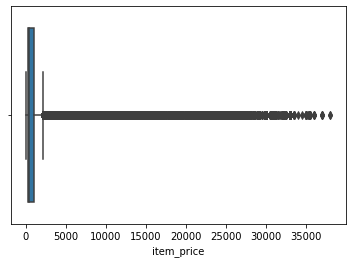

In [ ]:
import seaborn as sns
sns.boxplot(x=df_train.item_price)

In [ ]:
df_train=df_train[(df_train.item_price<40000)]

In [ ]:
df_train = df_train.groupby(['date_block_num' , 'shop_id' , 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
df_train.head()
#df_train.tail(20)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [ ]:
df_train = df_train.groupby(['date_block_num']).agg({'item_cnt_day': 'sum'})
df_train.head()

,item_cnt_day
date_block_num,
0,131850.0
1,128382.0
2,147438.0
3,107439.0
4,107148.0


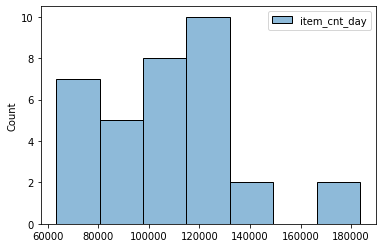

In [ ]:
sns.histplot(df_train)

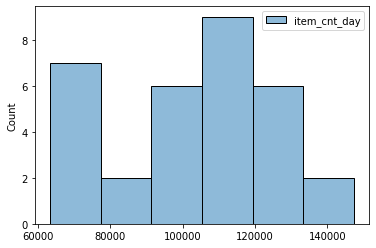

In [ ]:
sns.histplot(df_train[df_train.values<160000])

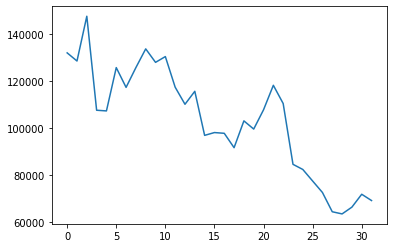

In [ ]:
new_df=df_train[df_train.values<160000].reset_index()
new_df['item_cnt_day'].plot(kind='line')

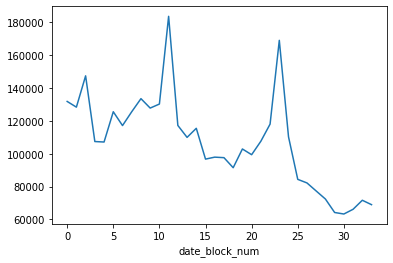

In [ ]:
df_train['item_cnt_day'].plot(kind='line')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#result = seasonal_decompose(df_train['item_cnt_day'], model="multiplicative", freq=12,extrapolate_trend='freq')
result = seasonal_decompose(df_train['item_cnt_day'], model="additive", freq=12,extrapolate_trend='freq')

In [ ]:
#result = seasonal_decompose(df_train['item_cnt_day'], model="multiplicative", freq=12,extrapolate_trend='freq')
result = seasonal_decompose(new_df['item_cnt_day'], model="additive", freq=12,extrapolate_trend='freq')

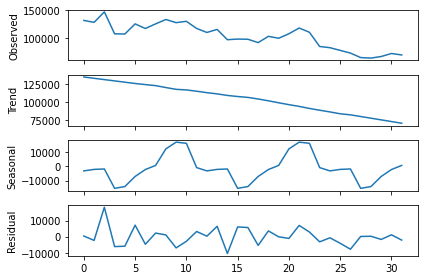

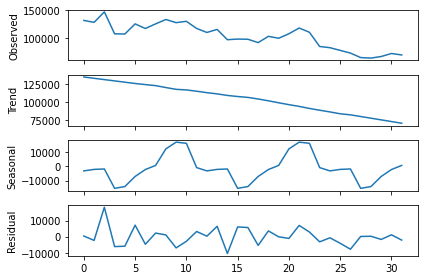

In [ ]:
result.plot()

In [ ]:
seasonal = pd.DataFrame(result.seasonal)
seasonal.head()
#seasonal.plot()

,item_cnt_day
date_block_num,
0,1697.750376
1,-8336.748458
2,1410.113818
3,-17537.454460
4,-17941.220438


In [ ]:
trend= pd.DataFrame(result.trend)
trend.head(10)

,item_cnt_day
date_block_num,
0,141077.644376
1,139284.432547
2,137491.220717
3,135698.008887
4,133904.797057
5,132111.585227
6,129882.541667
7,128506.958333
8,126409.250000


In [ ]:
residual = pd.DataFrame(result.resid)
#residual.head(33)

In [ ]:
#nlags=2
df=trend
df['t+1']=df.shift(-1)
df['t+2']=df['t+1'].shift(-1)
df['t+3']=df['t+2'].shift(-1)

In [ ]:
df=df.rename(columns={'item_cnt_day':'trend'})
df=df.dropna()
df.head(30)

,trend,t+1,t+2,t+3
date_block_num,,,,
0,141077.644376,139284.432547,137491.220717,135698.008887
1,139284.432547,137491.220717,135698.008887,133904.797057
2,137491.220717,135698.008887,133904.797057,132111.585227
3,135698.008887,133904.797057,132111.585227,129882.541667
4,133904.797057,132111.585227,129882.541667,128506.958333
5,132111.585227,129882.541667,128506.958333,126409.250000
6,129882.541667,128506.958333,126409.250000,124632.875000
7,128506.958333,126409.250000,124632.875000,123803.500000
8,126409.250000,124632.875000,123803.500000,122254.750000


In [ ]:
df['t+3']

0     129170.040258
1     127367.234460
2     125564.428662
3     124044.208333
4     122596.000000
5     119947.000000
6     117438.875000
7     116646.125000
8     114829.333333
9     112815.458333
10    111131.541667
11    108961.291667
12    107474.125000
13    106235.083333
14    104035.250000
15    101511.666667
16     98765.083333
17     96161.541667
18     93744.458333
19     90910.791667
20     88426.791667
21     86071.125000
22     83502.500000
23     82007.310606
24     79681.299242
25     77355.287879
26     75029.276515
27     72703.265152
28     70377.253788
Name: t+3, dtype: float64

In [ ]:
X=df[['trend','t+1','t+2']]
y=df[['t+3']]
X.shape

(31, 3)

In [ ]:
x=trend[:23].values
y=trend[23:].values

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(x, y, length=n_input, batch_size=1)

ValueError: ignored

In [ ]:
generator

In [ ]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Bidirectional

In [ ]:
n_features = 1
#n_steps=3 

In [ ]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X,y, epochs=300, verbose=1)

Epoch 1/300


ValueError: ignored

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X,y, epochs=300, verbose=1)

Epoch 1/300


ValueError: ignored

In [ ]:
train_x=X[:22]
train_y=y[:22]
test_x=X[23:]
test_y=y[23:]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10).fit(train_x,train_y)
pred=clf.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored